<h1><strong><u>Penguin Classifier Model</u></strong></h1>

In [3]:
%%capture
%run KNNPenguinClassifier.ipynb
%run LogisticPenguinClassifier.ipynb
%run MLPPenguinClassifier.ipynb

In [4]:
knn_classifier = knn_penguin_classifier()
log_classifier = log_penguin_classifier()
mlp_classifier = mlp_penguin_classifier()
print(knn_classifier)
print(log_classifier)
print(mlp_classifier)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e71fd70>),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15e71f6b0>)])),
                ('clf', KNeighborsClassifier(n_neighbors=7))])
Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15eae8470>),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                               

<h2><strong><u>Final Model Selection</u></strong></h2>

<h3><strong><u>Cross-Validation Test</u></strong></h3>

In [5]:
pipeline = Pipeline(
    [
        ("pl", None)
    ]
) 
param_grid = {"pl": [knn_classifier, log_classifier, mlp_classifier]}
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)
best_model = grid_search.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Parameters:  {'pl': Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15ebb3050>),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x15ebb2f90>)])),
                ('clf',
                 MLPClassifier(hidden_layer_sizes=(24,), max_iter=2000,
                               random_state=1))])}


<h2><strong><u>Model Testing</u></strong></h2>

<h3><strong><u>Performance Metrics</u></strong></h3>

In [6]:
test_predictions = best_model.predict(X_test)

In [7]:
for key, value in clf_metrics.items():
    print(f"{key}")
    log_test_values = cross_val_score(best_model, X_test, y=y_test, scoring=value, cv=5)
    print(f"CV test Scores: ", log_test_values)
    np_log_test_values = np.array(log_test_values)
    average = np.mean(np_log_test_values)
    stDev = np.std(np_log_test_values)
    print(f"Average and Standard Error: ", "{:.2f}%".format(average.round(2)), "\u00B1", "{:.2f}%".format(stDev.round(4)*100), "\n")

Accuracy
CV test Scores:  [1. 1. 1. 1. 1.]
Average and Standard Error:  1.00% ± 0.00% 

Precision (Micro)
CV test Scores:  [1. 1. 1. 1. 1.]
Average and Standard Error:  1.00% ± 0.00% 

Recall (Micro)
CV test Scores:  [1. 1. 1. 1. 1.]
Average and Standard Error:  1.00% ± 0.00% 



Text(0.5, 1.0, 'Final Spam Classifier: Confusion Matrix (Test)')

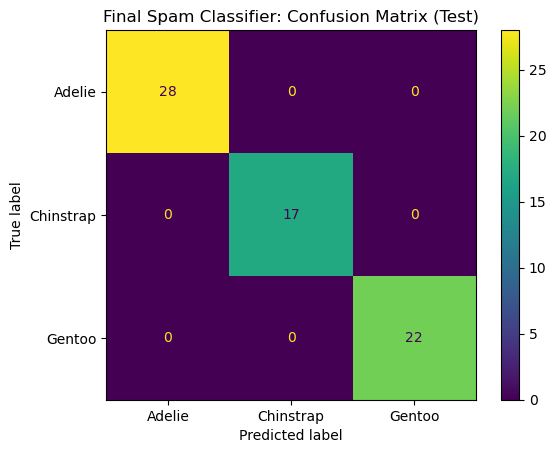

In [9]:
#Testing Confusion Matrix
disp = ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
disp.ax_.set_title("Final Spam Classifier: Confusion Matrix (Test)")

<h1><strong><u>Final Thoughts</u></strong></h1>
As shown, the Multi-Layered Perceptron was chosen as the final penguin classifier model and it resulted in perfect scores on the hold-out data.